In [37]:
%matplotlib inline

In [55]:
import json
import random

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
 df = pd.read_csv('Popular_Baby_Names.csv') 

In [59]:
df

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
69209,2012,MALE,BLACK NON HISP,CAYDEN,19,52
69210,2013,FEMALE,WHITE NON HISPANIC,Margaret,25,67
69211,2013,FEMALE,WHITE NON HISPANIC,Tamar,10,82
69212,2013,FEMALE,WHITE NON HISPANIC,Amanda,13,79


In [103]:
G = nx.Graph()

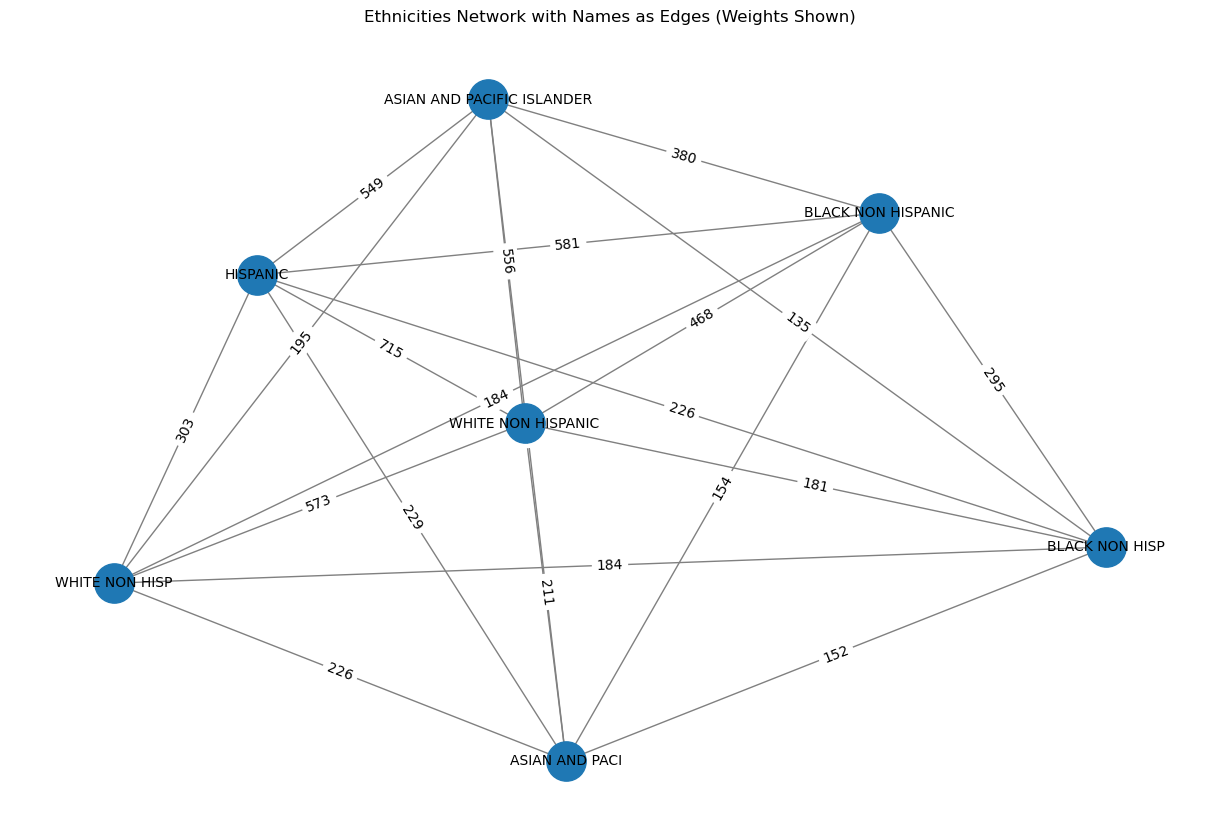

In [105]:


# Create a dictionary to map names to ethnicities
name_ethnicity = {}

# Populate the dictionary with names and the corresponding ethnicities
for _, row in df.iterrows():
    name = row["Child's First Name"]
    ethnicity = row["Ethnicity"]
    
    if name not in name_ethnicity:
        name_ethnicity[name] = set()
    name_ethnicity[name].add(ethnicity)

# Add ethnicities as nodes
ethnicities = set()
for ethnicities_set in name_ethnicity.values():
    ethnicities.update(ethnicities_set)

G.add_nodes_from(ethnicities)

# Add edges between ethnicities that share a common name and set a weight
for name, ethnicities_set in name_ethnicity.items():
    ethnicities_list = list(ethnicities_set)
    for i in range(len(ethnicities_list)):
        for j in range(i + 1, len(ethnicities_list)):
            # Check if the edge exists and set weight
            if G.has_edge(ethnicities_list[i], ethnicities_list[j]):
                G[ethnicities_list[i]][ethnicities_list[j]]['weight'] += 1
            else:
                G.add_edge(ethnicities_list[i], ethnicities_list[j], weight=1)

# Draw the graph with edge weights
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Layout for better spacing
nx.draw(G, pos, with_labels=True, node_size=800, font_size=10, edge_color="gray")

# Add edge labels (show the weight)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Ethnicities Network with Names as Edges (Weights Shown)")
plt.show()